## Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Changing default pandas setting to custom
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

## Loading Data

First of all we load the dataset using pandas, there is many functions in pandas through which we read the data in excel, csv database etc here we use a function read_csv that reads the data in a csv file and head()function is used to print the top 5 rows by default.

In [ ]:
df = pd.read_csv("sharks.csv", index_col=[-1])
df.head()

,murkiness.level,avg.dolphins.seen.per.day,previous.week.fishing,diversity.of.prey,seals.seen,water.temp,people.previous.day,seagull.density,common.surfboard.colour,overcast.weather,time.of.day,shark
ID,,,,,,,,,,,,
245,13.11,3.421591,0.59601,34.66,6.718047,3.335635,81.0,0.69860,red,0,afternoon,1
40,11.99,2.874611,0.54274,19.39,6.242029,3.127024,49.0,0.62020,orange,0,morning,0
424,12.91,2.827774,0.52377,15.75,6.397929,3.052446,46.0,0.58235,red,0,night,0
17,12.06,2.772961,0.51963,13.25,6.278146,3.114239,43.0,0.57025,red,0,afternoon,1
283,15.06,3.271684,0.58815,47.14,6.932448,3.214831,83.0,0.71150,red,0,morning,1


# Data Exploration

Before moving forward we need to know the following information from our data such as its shape, size of dataset and we print the numerical and categorical columns. Moreover use .info() method to get the datatypes of all columns and after that we deep dive into the statistical summary of the dataset.

The statistical summary shows the variation in data, its spread inaddition to other important things aswell such mean and mode of the data where then we compare the spread of different columns of shark data that assists in taking two decisions and that is to either go with feature selection or not. Also helps us to identify the need to scale the features and statistical summary of categorical features tells us the unique, top value of the categorical features.

The spread of the murkiness.level is very large and there is big differences between minimum and the maximum value. All other features have low spread and low minimum and maximum values, so overall we don't need any feature scaling on this specific dataset.

In [ ]:
# Function to perform all EDA
def perform_eda(df, name=""):
    # Printing basic detail of data like name, size, shape
    print(f"EDA of {str(name)} Data....")
    print(f"Size {df.size}")
    print(f"Columns {df.shape[1]}")
    print(f"Records {df.shape[0]}")
    print("="*50)

    # Printing top 5 records of data
    print("First Look of Data....")
    display(df.head())
    print("="*50)

    # Getting Numerical and Categorical columns Separately
    cat_cols = df.select_dtypes(np.object).columns
    num_cols = df.select_dtypes(np.number).columns

    # Printing the Numerical columns
    print("Dataset has following Numerical columns...")
    for i, j in enumerate(num_cols):
        print(f" {i+1}) {j}")

    # Printing the Categorical columns
    print("\n\nDataset has following Categorical columns...")
    for i, j in enumerate(cat_cols):
        print(f" {i+1}) {j}")

    # Printing info of data like data type, non null values
    print()
    print("="*50)
    print("Information of Data....")
    print(df.info())
    print("="*50)

    # Displaying statistical properties of data like mean, median, max, min
    print("Statistical Properties of Data....")
    display(df.describe(include="all"))
    print("="*50)

In [ ]:
perform_eda(df, "Sharks")

EDA of Sharks Data....
Size 5472
Columns 12
Records 456
First Look of Data....


,murkiness.level,avg.dolphins.seen.per.day,previous.week.fishing,diversity.of.prey,seals.seen,water.temp,people.previous.day,seagull.density,common.surfboard.colour,overcast.weather,time.of.day,shark
ID,,,,,,,,,,,,
245,13.11,3.421591,0.59601,34.66,6.718047,3.335635,81.0,0.69860,red,0,afternoon,1
40,11.99,2.874611,0.54274,19.39,6.242029,3.127024,49.0,0.62020,orange,0,morning,0
424,12.91,2.827774,0.52377,15.75,6.397929,3.052446,46.0,0.58235,red,0,night,0
17,12.06,2.772961,0.51963,13.25,6.278146,3.114239,43.0,0.57025,red,0,afternoon,1
283,15.06,3.271684,0.58815,47.14,6.932448,3.214831,83.0,0.71150,red,0,morning,1


Dataset has following Numerical columns...
 1) murkiness.level
 2) avg.dolphins.seen.per.day
 3) previous.week.fishing
 4) diversity.of.prey
 5) seals.seen
 6) water.temp
 7) people.previous.day
 8) seagull.density
 9) overcast.weather
 10) shark


Dataset has following Categorical columns...
 1) common.surfboard.colour
 2) time.of.day

Information of Data....
<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 245 to 366
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   murkiness.level            456 non-null    float64
 1   avg.dolphins.seen.per.day  455 non-null    float64
 2   previous.week.fishing      455 non-null    float64
 3   diversity.of.prey          455 non-null    float64
 4   seals.seen                 456 non-null    float64
 5   water.temp                 455 non-null    float64
 6   people.previous.day        453 non-null    float64
 7   seagull.density      

,murkiness.level,avg.dolphins.seen.per.day,previous.week.fishing,diversity.of.prey,seals.seen,water.temp,people.previous.day,seagull.density,common.surfboard.colour,overcast.weather,time.of.day,shark
count,456.000000,455.000000,455.000000,455.000000,456.000000,455.000000,453.000000,456.000000,456,456.000000,456,456.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red,NaN,night,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216,NaN,172,NaN
mean,22.857656,3.010865,0.549480,41.681767,6.623185,3.132817,61.249448,0.613652,NaN,0.004386,NaN,0.368421
std,130.770478,0.317467,0.040428,49.059173,0.563944,0.081336,27.191830,0.067054,NaN,0.066154,NaN,0.482906
min,6.981000,2.718282,0.500000,6.802000,5.221436,2.926373,34.000000,0.500000,NaN,0.000000,NaN,0.000000
25%,11.697500,2.796446,0.519315,17.740000,6.244118,3.076468,45.000000,0.562885,NaN,0.000000,NaN,0.000000
50%,13.275000,2.888364,0.533340,24.600000,6.516562,3.127381,53.000000,0.598840,NaN,0.000000,NaN,0.000000
75%,16.040000,3.123109,0.576595,45.410000,6.989334,3.181002,69.000000,0.661300,NaN,0.000000,NaN,1.000000


make plots function is used here to plot the barplot with label xaxis , title and i also printed the percentage on the bar plot. I have also plotted a pie plot  and that is used for the distribution of features to view as balanced or unbalanced so we handle the features accordingly.
category 0 = shark wasnt present and category 1 = shark present
noticed that 288 times there is no shark appearances and 168 instances where shark appeared at the beach so label feature is not really unbalanced where i also plotted this percentage through pie chart.

In [ ]:
def make_plots(feature, title=""):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)

    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

Total unique values are:  2 


Category	Value

0    288
1    168
Name: shark, dtype: int64


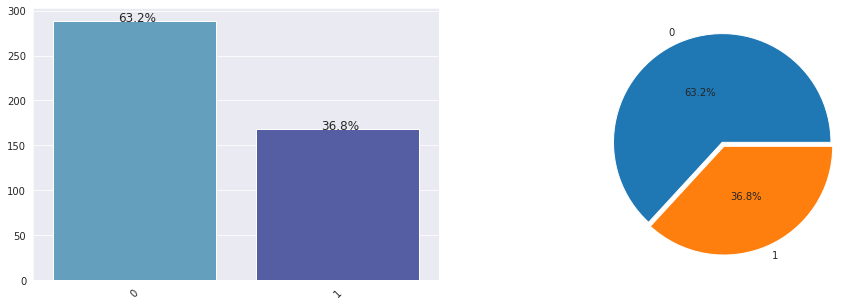

In [ ]:
make_plots(df.shark)

Some ambigous values are present in some of categorical features like in feature named "time-of-day" has one ambigous and repeating value "morn7ing". Similarly in "common.surfboard.colour" ambigous values is present.
So, let's replace them with the original values.

In [ ]:
df["common.surfboard.colour"].replace("yyellow", "yellow", inplace=True)
df["time.of.day"].replace("morni7ng", "morning", inplace=True)

In [ ]:
def make_crosstab(x, target_name, df=df, top_cat=3):
    # Code to get a random color map for graph
    color_maps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu',
                  'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired',
                  'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr',
                  'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r',
                  'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r',
                  'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool',
                  'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',
                  'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',
                  'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot',
                  'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno',
                  'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r',
                  'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic',
                  'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r',
                  'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'twilight', 'twilight_r', 'twilight_shifted',
                  'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

    # Selecting Color map
    rand = np.random.randint(1, len(color_maps))
    cmap = color_maps[rand]

    # Making crosstab and then plotting it in form of bar chart
    pd.crosstab(df[target_name], df[x]).plot(kind="bar", cmap=cmap, stacked=True, figsize=(14, 5))
    plt.show()

    # Calculating the ratio of appearance for each unique value of feature
    data = {}
    for i in df[x].unique():
        nomer = df[((df[target_name] == 1) & (df[x] == i))]
        denom = df[(df[x] == i)]
        try:
            rate = 100*(len(nomer)/len(denom))
        except:
            rate = 0
        data[i] = rate

    # Sorting values according to ratio
    data = dict(sorted(data.items(), reverse=True, key=lambda item: item[1]))

    # Printing top 3 categories with their ratio
    for i, j in data.items():
        if top_cat > 0:
            print(f"Appearance rate for category {str(i).upper()} in variable {str(x).upper()} is {j}")
            top_cat -= 1
        else:
            break

so the below indicates that the most common surfboard color is red when sharks are not appeared and after that the second most common surfboard color is orange when shark's not appeared.
And the same trend but this time when shark appeared on the beach so most common color is again is red and second most common is orange.

I find out an interesting information about sharks through some research and that they may be color blind so i do not assume sharks are attracted to surfers with any specific color surfboards or if affects the number of attacks. moreover, what if there is a surfshop nearby that tends to have more red and orange boards than yellow or there is none sold there so i think this Feature is not too meaningful in my opinion but the amount of surfers there can be.

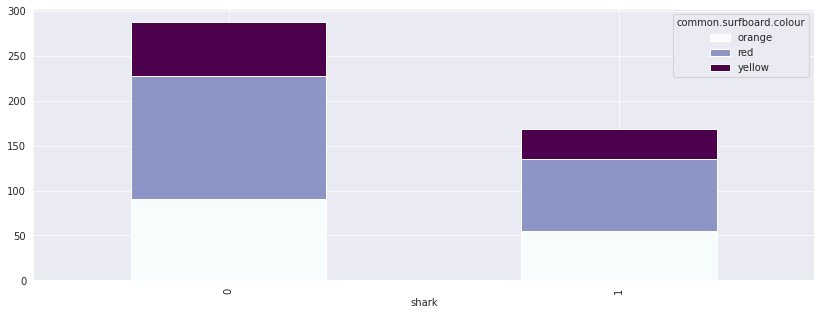

Appearance rate for category ORANGE in variable COMMON.SURFBOARD.COLOUR is 37.67123287671233
Appearance rate for category RED in variable COMMON.SURFBOARD.COLOUR is 37.03703703703704
Appearance rate for category YELLOW in variable COMMON.SURFBOARD.COLOUR is 35.1063829787234


In [ ]:
make_crosstab("common.surfboard.colour", "shark")

category 0 = weather is overcast and  category 1 means the weather is sunny so we clearly see that the most of the time the weather is overcast, all times when weather is overcast and shark not appeared on beach and very few times shark appeared when weather is sunny so its helps to decide shark love to come out in sunny and overcast.

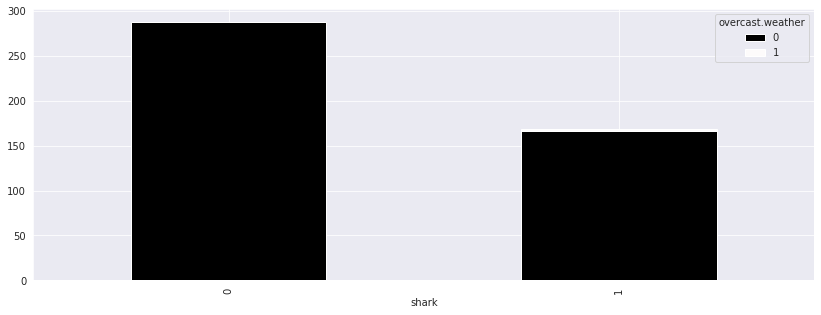

Appearance rate for category 1 in variable OVERCAST.WEATHER is 100.0
Appearance rate for category 0 in variable OVERCAST.WEATHER is 36.56387665198238


In [ ]:
make_crosstab("overcast.weather", "shark")

Below distribution tells us the time of the day where we might expect shark appearances and also when it not likely to appear in the night and 41% prediction of an attack are in the morning time and where its around 30% in night and afternoon so i want to conclude that overall the sharks attack during the morning.

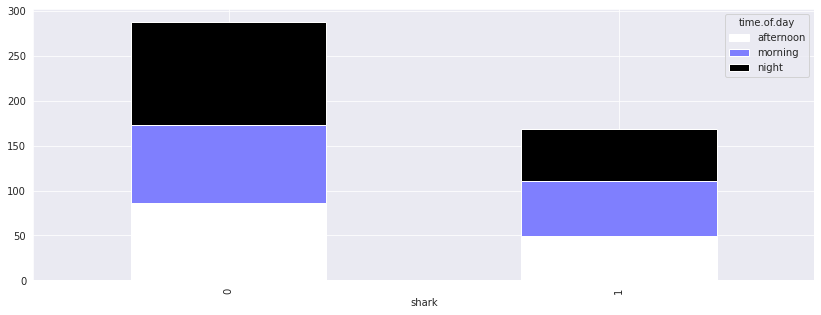

Appearance rate for category MORNING in variable TIME.OF.DAY is 41.61073825503356
Appearance rate for category AFTERNOON in variable TIME.OF.DAY is 36.2962962962963
Appearance rate for category NIGHT in variable TIME.OF.DAY is 33.13953488372093


In [ ]:
make_crosstab("time.of.day", "shark")

Below function helps us explore the features by finding the mean, median, variance(spread) skewness ( if the distribution is right skewed or left skewed) and also the minimum and maximum values of the features.

So here we can identify if our distribution is normal or not.
If the spread (range) is large or small and find out if our dataset is balanced or not balanced.
i checked the correlation  of any features with target features and ratio of shark appearance dependent on the given features so this helps us to know the important and unrelevant features of the dataset so this helps us in feature selection because we dont want to confuse our model by putting irrelevant columns in our Dataset.

In [ ]:
# Function to explore continous features
def explore_feature(feature_name, target_name="Exited", target_value=1):
    # Printing details
    print(f"Exploring {str(feature_name).upper()}........")
    print(f"Mean of {feature_name}     : {df[feature_name].mean()}")
    print(f"Median of {feature_name}   : {df[feature_name].median()}")
    print(f"Variance of {feature_name} : {df[feature_name].var()}")
    print(f"Skewness of {feature_name} : {df[feature_name].skew()}")
    print(f"Maximum of {feature_name}  : {df[feature_name].max()}")
    print(f"Minimum of {feature_name}  : {df[feature_name].min()}")
    temp = df[[feature_name, target_name]]
#     temp[target_name] = temp[target_name].map({"Negative": 0, 1: 1})
    corr = temp.corr().iloc[0, 1]
    print(f"Correlation with the target feature : {corr}")
    temp = df[df[feature_name] > df[feature_name].mean()]
    ratio = len(temp[temp[target_name] == 1])/len(temp)
    print(f"Ratio of Shark Appearance if {str(feature_name).upper()} is more than average value : {ratio}")
    temp = df[df[feature_name] < df[feature_name].mean()]
    ratio = len(temp[temp[target_name] == 1])/len(temp)
    print(f"Ratio of Shark Appearance if {str(feature_name).upper()} is less than average value : {ratio}")

Here we explore the features one by at a time to find its coorelation with the target feature


We see here that the mean of murkiness.level is 22 and its maximum value is 1990 so its mean features is left skewed and the variance(measure of spread) is very large and the correlation with the target feature is negative and moderately correlated and the ratio of shark appearance based on this feature is more then average is 78%.



In [ ]:
explore_feature("murkiness.level", "shark")

Exploring MURKINESS.LEVEL........
Mean of murkiness.level     : 22.857655701754386
Median of murkiness.level   : 13.274999999999999
Variance of murkiness.level : 17100.91800201966
Skewness of murkiness.level : 15.032321281702947
Maximum of murkiness.level  : 1990.2
Minimum of murkiness.level  : 6.981
Correlation with the target feature : -0.03189395594225865
Ratio of Shark Appearance if MURKINESS.LEVEL is more than average value : 0.7857142857142857
Ratio of Shark Appearance if MURKINESS.LEVEL is less than average value : 0.3552036199095023


So mean of avg.dolphins.seen.per.day is 3 and and maximum value is 4.6 so its mean features is not highly skewed and variance(measure of spread) is very low and correlation is positive and moderately correlated and the ratio of shark appearance based on this feature is more then average and is exactly on 80% so it deem this column or feature as an important one.

More dolphins in the vicinity attracts more sharks ?

In [ ]:
explore_feature("avg.dolphins.seen.per.day", "shark")

Exploring AVG.DOLPHINS.SEEN.PER.DAY........
Mean of avg.dolphins.seen.per.day     : 3.010865082753846
Median of avg.dolphins.seen.per.day   : 2.888364376
Variance of avg.dolphins.seen.per.day : 0.10078538018803734
Skewness of avg.dolphins.seen.per.day : 2.059809387852735
Maximum of avg.dolphins.seen.per.day  : 4.629024533
Minimum of avg.dolphins.seen.per.day  : 2.718281828
Correlation with the target feature : 0.5645773978808416
Ratio of Shark Appearance if AVG.DOLPHINS.SEEN.PER.DAY is more than average value : 0.8012048192771084
Ratio of Shark Appearance if AVG.DOLPHINS.SEEN.PER.DAY is less than average value : 0.12110726643598616


The mean of previous.week.fishing is 0.54 and minimum value is 0.5  and and maximum value is 0.7 so its mean features is not skewed and variance(measure of spread) is very very low and correlation is positive and moderately correlated and the ratio of shark appearence based on this feature that is more then average is 80% so we can maybe consider this important.

More fisherman around perhaps leads to more sharks swimming around due to fish bait ?

In [ ]:
explore_feature("previous.week.fishing", "shark")

Exploring PREVIOUS.WEEK.FISHING........
Mean of previous.week.fishing     : 0.5494803274725275
Median of previous.week.fishing   : 0.53334
Variance of previous.week.fishing : 0.0016343915441017767
Skewness of previous.week.fishing : 1.1771761711705557
Maximum of previous.week.fishing  : 0.7012
Minimum of previous.week.fishing  : 0.5
Correlation with the target feature : 0.6840499142664686
Ratio of Shark Appearance if PREVIOUS.WEEK.FISHING is more than average value : 0.7777777777777778
Ratio of Shark Appearance if PREVIOUS.WEEK.FISHING is less than average value : 0.09818181818181818


Here below mean of diversity.of.prey is 24 and minimum value is 6 and the maximum value is 542 so its mean features is right skewed  and variance(measure of spread) is very large and correlation is positive and moderately correlated and the ratio of shark appearence based on this feature that is more then average and is around 86% ... so we can consider diversity of prey or alot of fishes in the area as a good indication to having sharks over which might lead to attacks on humans mistakenly ?

In [ ]:
explore_feature("diversity.of.prey", "shark")

Exploring DIVERSITY.OF.PREY........
Mean of diversity.of.prey     : 41.68176703296704
Median of diversity.of.prey   : 24.6
Variance of diversity.of.prey : 2406.802495994065
Skewness of diversity.of.prey : 5.311924343573265
Maximum of diversity.of.prey  : 542.2
Minimum of diversity.of.prey  : 6.802
Correlation with the target feature : 0.5010151507813938
Ratio of Shark Appearance if DIVERSITY.OF.PREY is more than average value : 0.8671875
Ratio of Shark Appearance if DIVERSITY.OF.PREY is less than average value : 0.1712538226299694


The mean of seals.seen is 6.62 and minimum value is 5.22 and maximum value is 8.35 so its mean features is not skewed  and variance(measure of spread) is very small and correlation is positive and highly correlated and the ratio of shark appearence based on this feature that is more then average is 79%. So we for sure know if there are seals seen we are expecting sharks around as they are predators often lurking in deep water looking for prey and might end up attacking humans as a paddling surfer looks a lot like a seal.


In [ ]:
explore_feature("seals.seen", "shark")

Exploring SEALS.SEEN........
Mean of seals.seen     : 6.6231854228706135
Median of seals.seen   : 6.5165616244999995
Variance of seals.seen : 0.3180327613694653
Skewness of seals.seen : 0.5245057245616094
Maximum of seals.seen  : 8.355614996
Minimum of seals.seen  : 5.221436322
Correlation with the target feature : 0.7208052937296499
Ratio of Shark Appearance if SEALS.SEEN is more than average value : 0.7903225806451613
Ratio of Shark Appearance if SEALS.SEEN is less than average value : 0.07777777777777778


I do not consider the water temperature to be an important feature.

In [ ]:
explore_feature("water.temp", "shark")

Exploring WATER.TEMP........
Mean of water.temp     : 3.1328167923076924
Median of water.temp   : 3.127380639
Variance of water.temp : 0.006615529024535173
Skewness of water.temp : 0.5986628245367196
Maximum of water.temp  : 3.487972931
Minimum of water.temp  : 2.926372935
Correlation with the target feature : 0.330338933163051
Ratio of Shark Appearance if WATER.TEMP is more than average value : 0.5305164319248826
Ratio of Shark Appearance if WATER.TEMP is less than average value : 0.22727272727272727


The exploration below shows that the coorelation is not strong. i do not consider this as an important feature as sharks do not consider humans as targets but studies have shown that the sharks mistake humans for their natural prey based on visual similarities moreover it has nothing to do with why we have sharks at the beach.

In [ ]:
explore_feature("people.previous.day", "shark")

Exploring PEOPLE.PREVIOUS.DAY........
Mean of people.previous.day     : 61.24944812362031
Median of people.previous.day   : 53.0
Variance of people.previous.day : 739.3956025708649
Skewness of people.previous.day : 2.947816369043984
Maximum of people.previous.day  : 267.0
Minimum of people.previous.day  : 34.0
Correlation with the target feature : 0.43596069311053304
Ratio of Shark Appearance if PEOPLE.PREVIOUS.DAY is more than average value : 0.7218543046357616
Ratio of Shark Appearance if PEOPLE.PREVIOUS.DAY is less than average value : 0.19536423841059603


# Data Preparation



Here below i have tried looking into the unique, missing values and its percentage as the quantity of missing values will determine the decision to disregard them or fill these missing values. So if we are missing a few we can allow it however if its more than half or this trend goes for majority of the dataset then we have to fill in the blank values using various data gathering techniques.

They are barely any so we drop the missing values and now we have a clean dataset to carry over to the next step.

In [ ]:
# Checking Null values
# lets try to check the percentage of missing values,unique values,percentage of one catagory values and type against each column.
def statistics(df):
    stats = []
    # Iterating all columns
    for col in df.columns:
        # Calculating different details and storing it into list
        stats.append((col, df[col].nunique(), df[col].isnull().sum(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))

    # Converting list into table
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Missing values', 'Percentage of Missing Values', 'Data Type'])
    # Setting column name as index
    stats_df.set_index('Feature', drop=True, inplace=True)
    # Droping features in which no NAN  is present
    stats_df.drop(stats_df[stats_df['Missing values'] == 0].index, axis=0, inplace=True)
    # Sorting table according to number of NAN
    stats_df.sort_values('Percentage of Missing Values', ascending=False, inplace=True)
    return stats_df

statistics(df)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,
people.previous.day,87,3,0.657895,float64
avg.dolphins.seen.per.day,432,1,0.219298,float64
previous.week.fishing,434,1,0.219298,float64
diversity.of.prey,426,1,0.219298,float64
water.temp,345,1,0.219298,float64


In [ ]:
# Dropping NAN
df.dropna(inplace=True)

In [ ]:
# Checking Duplicates
df[df.duplicated()]

,murkiness.level,avg.dolphins.seen.per.day,previous.week.fishing,diversity.of.prey,seals.seen,water.temp,people.previous.day,seagull.density,common.surfboard.colour,overcast.weather,time.of.day,shark
ID,,,,,,,,,,,,


The statistical summary of dataset .Provides us with vital information like :
the distribution, spread , lower quartile, upper quartile of the data so we also get to know the oitliers in the dataset by this summary and it also helps us to decide either we need scale the features or not and more things aswell

In [ ]:
df.describe()

,murkiness.level,avg.dolphins.seen.per.day,previous.week.fishing,diversity.of.prey,seals.seen,water.temp,people.previous.day,seagull.density,overcast.weather,shark
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,22.987225,3.011418,0.549554,41.732503,6.622294,3.132918,61.260579,0.613689,0.004454,0.369710
std,131.783238,0.318383,0.040446,49.233303,0.563293,0.081340,27.280721,0.067188,0.066666,0.483265
min,6.981000,2.718282,0.500000,6.802000,5.221436,2.926373,34.000000,0.500000,0.000000,0.000000
25%,11.690000,2.795771,0.519390,17.740000,6.244749,3.076814,45.000000,0.562960,0.000000,0.000000
50%,13.270000,2.889468,0.533410,24.600000,6.518114,3.127381,53.000000,0.599100,0.000000,0.000000
75%,16.030000,3.125599,0.577260,45.420000,6.988413,3.181002,69.000000,0.661300,0.000000,1.000000
max,1990.200000,4.629025,0.701200,542.200000,8.355615,3.487973,267.000000,0.791000,1.000000,1.000000


If we just go to the top and see the statistical properties of features in exploration part then we will know that there are some features that has some outliers. These features are given below.

In [ ]:
# Features with outliers
cols = ["murkiness.level", "diversity.of.prey", "people.previous.day"]

Plot for murkiness.level


<Figure size 1008x432 with 0 Axes>

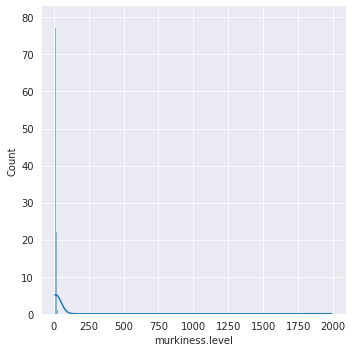

Plot for diversity.of.prey


<Figure size 1008x432 with 0 Axes>

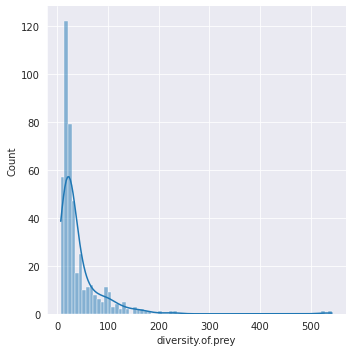

Plot for people.previous.day


<Figure size 1008x432 with 0 Axes>

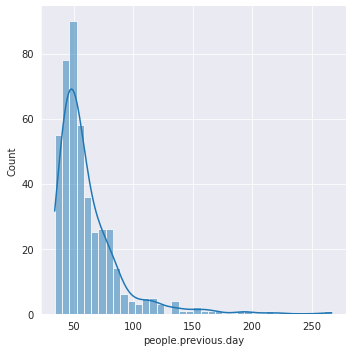

In [ ]:
for i in cols:
    print(f"Plot for {i}")
    plt.figure(figsize=(14, 6))
    sns.displot(df[i], kde=True)
    plt.show()
    print("="*120)

So outliers are discordant data and has an abnormal distance from other values hence why outliers can be a big problem for modeling so i will handle it and outliers can be a cruical main step in data preparation so we iterate through the columns, calculate the quartile and percentile and find the outliers in each columns and figure it out before heading on to the next steps so below is a demonstration of that :

In [ ]:
# Creating a copy of data
df_n = df.copy()

# Iterating each column
for x in df[cols].columns.tolist():
    # Calculating percentiles & interquartile range
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    # Getting max and min value
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    # Marking values as outlier if they are not in range
    df_n.loc[df[x] < min,x] = np.nan
    df_n.loc[df[x] > max,x] = np.nan

# lets try to check the sum of count of NULL values/outliers in each column of the dataset
temp = df_n.isnull().sum()
print(temp)

murkiness.level              14
avg.dolphins.seen.per.day     0
previous.week.fishing         0
diversity.of.prey            54
seals.seen                    0
water.temp                    0
people.previous.day          28
seagull.density               0
common.surfboard.colour       0
overcast.weather              0
time.of.day                   0
shark                         0
dtype: int64


so fortunately there are only few outliers and we will delete or drop them so it doesnt effect the model performance.

In [ ]:
# Dropping outliers
df = df_n.dropna(axis = 0)

In [ ]:
cat_cols = df.select_dtypes("O").columns
num_cols = df.iloc[:, :-4].columns

Label encoder is used here to handle the categorical features. Handling categorical features means to encode the categorical columns as our model needs the entire data in numeric format so this is an important step and another important note to keep in mind is that we need to preserve the relationship before and after the label encoding. In below code I iterated through object data type of columns and converted it in numbers 0 to 9.

In [ ]:
# Encoding Feature
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in df.select_dtypes("O").columns:
    df[i] = encoder.fit_transform(df[i])

Standard scaler is used to scale the features and I decided based upon the previous steps at the statistical summary section and distribution of different columns. This process is a very common pre-processing step.


In [ ]:
# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Spliting data into input and output
X = df.drop("shark", axis=1)
y = df.shark

In [ ]:
# Balancing data
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Modeling

In [ ]:
# Importing Evaluation matrices
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, roc_curve, roc_auc_score

we type in another function that *evaluates*. This function prints the entire array of all the evaluation metrics in classification such as precision, recall, f1 score ,accuracy,confusion matrix etc.
These metrics tell us the performance of model compared to the actual using the TN, FN, FP & TP.

However before moving forward i will breifly explain in plain terms what we need to know in the formula and the metrics's actual meanings so first we know that when we train the model it learns all aspects of the data and after that we evaluate the model on unseen data and cross check it a prediction so once a model creates any predictions we can then compare these prediction with the actual and find the accurate value.

**TN:** its mean model predicted that there is no shark appeared and on actual data also there is also no shark appeared so its mean model predicts correctly . In this way we have specific number so higher the number means model predict correctly.

**FN:** Model predict that there is no shark appeared today based on multiple features and on actual data the shark is appeared at that day so its mean model prediction is wrong so greater the value of FP means model performance is not good.

FP: So model predict that there is shark appeared on the sea at this day and on actual data there is no shark appeared on beach so its mean model prediction is wrong and is false positive so large number of false positive mean that model performance is affected

**TP:** So model predicts that there is shark appeared on the beach at that day and on actual data there is also shark appeared so model predicts correctly so its we need large number of True positive .

so we keep in mind these 4 concepts TN,TP,FP,FN . we need large value of TN and TP and low value of FN and FP and all others metrics is based on this concept.


so the confusion matrix is as below image plus the formula of precision and recall is given below



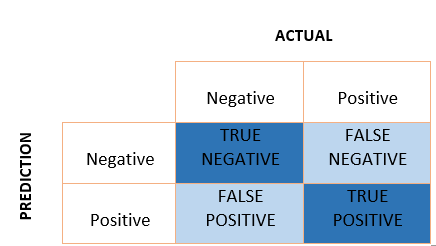





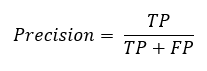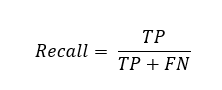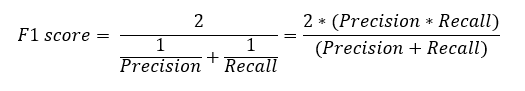

So the precision means total TP (model prediction at shark appeared on beach) is divided by model correct prediction plus model wrong prediction (shark appeared on beach but actually its not appeared)

So the recall means total TP (model prediction at shark appeared on beach) is divided by model correct prediction plus model wrong prediction (shark not appeared on beach but actually its  appeared)

similarly there is different formula of f1 score.

so higher the values of precision recall and f1 score means our model performance is very good so we need maximum values of all evaluation metrics and  on confusion matrix we need large values of TN and TP and lower value of FP and FN .In other words we need large value diagonally.

In [ ]:
def evaluate(y_test, y_pred, name):
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Precision
    precision = precision_score(y_test, y_pred, average=None)

    # Recall
    recall = recall_score(y_test, y_pred, average=None)

    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)

    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Report
    report = classification_report(y_test, y_pred)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\tFor {str(name).upper()} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Recall : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True)
    plt.show()


    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.figure(figsize=(14, 5))
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.legend(loc=4)
    plt.show()

### 1) Logistic Regression

Logistic regression is not a complex structure it works on a sigmoid graph and provides with a probability. So we already know that our data is balanced as we also handled our outliers and missing values and have we prepared the data very well to train it and we see that the logistic regression performs well.

Let us look into it more depply

So the accuracy,F1, recall and precision value is above 85% and TP and TN is also large but the FP and FN are very less.

AUC of 0.5 is not good and AUC of 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding

The TPR that is on xaxis and FPR is on y axis so higher the TPR and higher the FPR makes good value of auc so in logistic regression we scored a 88% auc, that is considered very good.


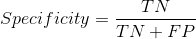


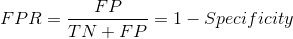

+ ==================================================================================================== +
			For LOGISTIC REGRESSION The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8832116788321168
--------------------------------------------------
F1 :  [0.88235294 0.88405797]
--------------------------------------------------
Recall :  [0.88235294 0.88405797]
--------------------------------------------------
Precision :  [0.88235294 0.88405797]
--------------------------------------------------
Confusion Matrix....
 [[60  8]
 [ 8 61]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        68
           1       0.88      0.88      0.88        69

    accuracy                           0.88       137
   macro avg       0.88      0.88      0.88       137
weighted

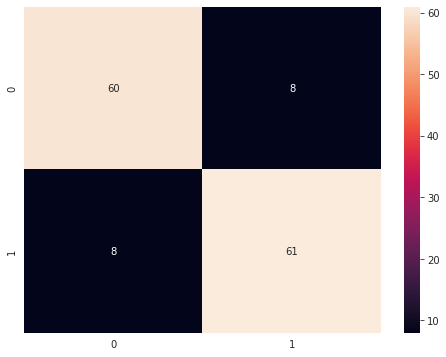

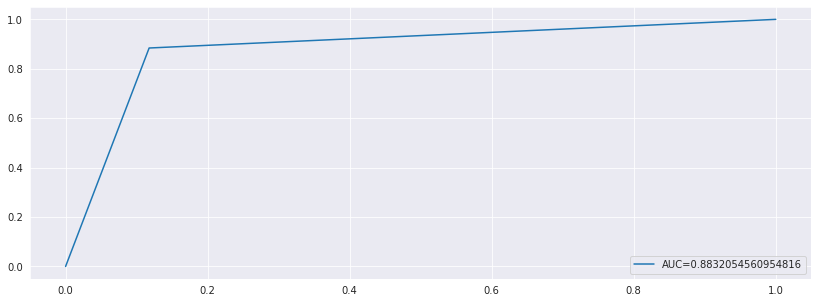

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate(y_test, y_pred, "Logistic Regression")

### 2) Random Forest

so here i used a random forest classifier which tends to be more robust in nature when compared to logistic regression and a tree based model and its performance tend to be very good on simple as well as complex datasets.

Random forest has a very good TP and its TN is large.
The actual and the value of wrong prediction FP and FN is small and it seems to be this is the best model out all three as all the metrics is above 90% that is extraordinary performance and only a few times RF model predicts wrong outputs out of 100 so this is a great performance by our model Moreover, we also have the option to tune the model, so in this way Random forest also tries to correct its mistakes/errors to achieve more accuracy probably more then 94% and value of auc is also very good at 94%

+ ==================================================================================================== +
			For RANDOM FOREST The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9416058394160584
--------------------------------------------------
F1 :  [0.94029851 0.94285714]
--------------------------------------------------
Recall :  [0.92647059 0.95652174]
--------------------------------------------------
Precision :  [0.95454545 0.92957746]
--------------------------------------------------
Confusion Matrix....
 [[63  5]
 [ 3 66]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.93      0.96      0.94        69

    accuracy                           0.94       137
   macro avg       0.94      0.94      0.94       137
weighted avg  

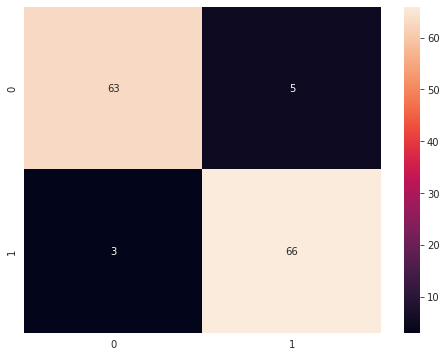

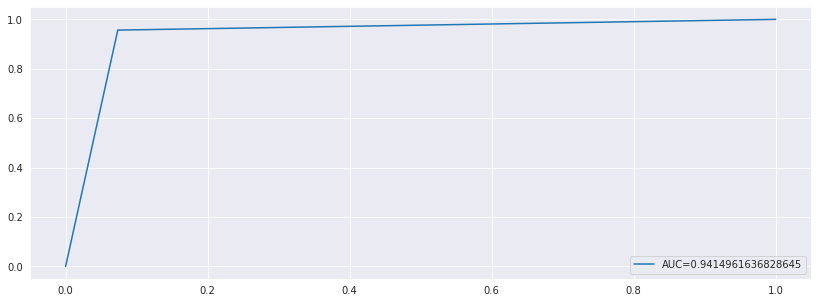

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate(y_test, y_pred, "Random Forest")

### Artificial Neural Network

so NN is a deep learning algorithm and we expect it to differently to the two other models as we need to add hidden layers one by one varying to the complexity of given dataset inaddition, if we want to built a complex network and your dataset is simple then it may cause underfitting.


Brief explanation behind NN in simple terms: if you have a large and complicated set of data then what we need to build is a large complex network with alot of hidden layers and start from 512 neurons then decrease a downwards and move to a final output layer where we can then have 1 neuron.

i have used a relu actification function on the hidden layer and used sigmoid on the output layer as we know that sigmoid has two outputs either 0 or 1s and that concludes to either shark appeared or not .. as this is a binary supervised learning problem either shark appeared on premises or not hence why we use sigmoid on the final layer and once we have built our network we set metrics and optimisers using the compile function inserted below. Optimizers are used to update the loss in our case. Lastly we train and print the results ( accuracy and validation at each epoch ). So if the model trains well then it performs well on unseen data when introduced.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
13/13 [==============================] - 2s 39ms/step - loss: 0.5739 - accuracy: 0.7457 - val_loss: 0.5316 - val_accuracy: 0.8248
Epoch 2/15
13/13 [==============================] - 0s 18ms/step - loss: 0.5243 - accuracy: 0.8044 - val_loss: 0.4873 - val_accuracy: 0.8321
Epoch 3/15
13/13 [==============================] - 0s 17ms/step - loss: 0.4901 - accuracy: 0.8240 - val_loss: 0.4526 - val_accuracy: 0.8613
Epoch 4/15
13/13 [==============================] - 0s 16ms/step - loss: 0.4626 - accuracy: 0.8484 - val_loss: 0.4234 - val_accuracy: 0.8686
Epoch 5/15
13/13 [==============================] - 0s 11ms/step - loss: 0.4400 - accuracy: 0.8582 - val_loss: 0.3965 - val_accuracy: 0.8905
Epoch 6/15
13/13 [==============================] - 0s 11ms/step - loss: 0.4196 - accuracy: 0.8631 - val_loss: 0.3728 - val_accuracy: 0.8978
Epoch 7/15
13/13 [==============================] - 0s 9ms/step - loss: 0.4022 - accuracy: 0.8655 - val_loss: 0.3529 - val_accuracy: 0.9051
Epoch 8/15
13/

The result of .predict function is in fractions so value greater than 0.5 is considered as 1 and less then 0.5 is 0

Ran it for 15 epochs

After printing the results and evaluating we see that this model rates better when compared to logistic regression however it is the best as random forest classifier has a better performance.

Normally to my knowledge the performance of neural networks leads the way and is always very good then any other machine learning model usually but in our case we built a network for a simple dataset than random forest hence why it is second here ?
TP and TN is very good here moreover the auc value is also very good as its scoring 89%.

5/5 [==============================] - 0s 4ms/step
+ ==================================================================================================== +
			For ANN The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8905109489051095
--------------------------------------------------
F1 :  [0.8951049  0.88549618]
--------------------------------------------------
Recall :  [0.94117647 0.84057971]
--------------------------------------------------
Precision :  [0.85333333 0.93548387]
--------------------------------------------------
Confusion Matrix....
 [[64  4]
 [11 58]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.85      0.94      0.90        68
           1       0.94      0.84      0.89        69

    accuracy                           0.89       137
   macro avg       0.89    

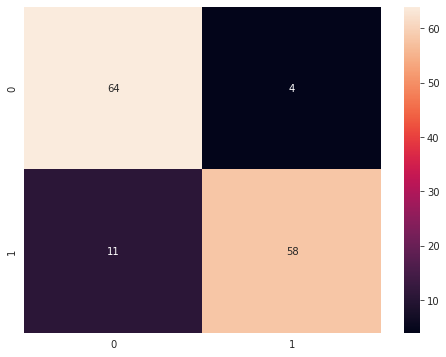

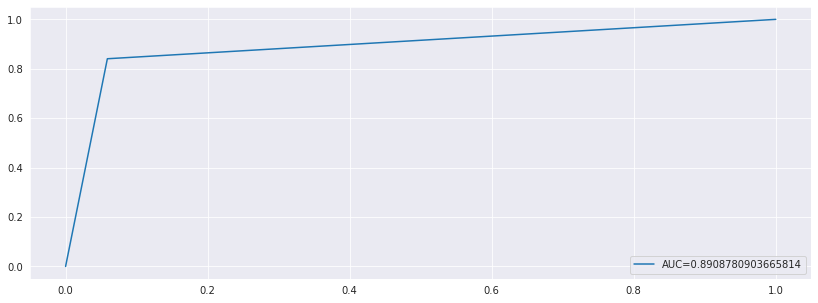

In [ ]:
y_pred = [1 if i>0.5 else 0 for i in model.predict(X_test)]
evaluate(y_test, y_pred, "ANN")

**Model performance Comparision and Quick Evaluation**

We compare the performance of all models in below dataframe :

The accuracy of the random forest is 94% and accuracy of the logistic regression comes in third with 88% and accuracy of ANN is 89% so performance of random forest in terms of accuracy is the best, the ANN in 2nd.
The precision score of random forest is again greater then logistic and the ANN. we notice that the ANN has a f1 score just a point above logistic regression however it has worse precision but a way better recall.

Afer evalution :
The Random forest is the go to model and the one i pick as it knocks everything out of the park when compared to the other two.



In [ ]:
d={
'metricss':["Accuracy","Precision","recall","F1_Measure"],
'Logistic Regression results':['88%','88%','88%','88%'],
'Random Forest results':['94%','95%','92%','94%'],
'ANN results':['89%','85%','94%','89%'],
}
df_result=pd.DataFrame(data=d)
df_result.set_index('metricss').T

metricss,Accuracy,Precision,recall,F1_Measure
Logistic Regression results,88%,88%,88%,88%
Random Forest results,94%,95%,92%,94%
ANN results,89%,85%,94%,89%


I added Hyperparamter tuning to see its effects on the model's outcome.

# **Hyperparameter tuning**

**Logistic Regression**

The performance of the logistic regression after tuning is affected because our dataset is already very simple hence why we did not need to make a complex model or in other word no need to tune the model as its internal external parameters performed really well with default settings/values.


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))





Best: 0.873801 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.867256 (0.055092) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.867256 (0.055092) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.867256 (0.055092) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.867256 (0.054730) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.867256 (0.054730) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.866443 (0.054745) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.865610 (0.054362) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.865610 (0.054362) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.864797 (0.054716) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.873801 (0.053716) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.873801 (0.053716) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.868110 (0.054618) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.868089 (0.054306) wit

+ ==================================================================================================== +
			For  TUNED LOGISTIC REGRESSION The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8759124087591241
--------------------------------------------------
F1 :  [0.87769784 0.87407407]
--------------------------------------------------
Recall :  [0.89705882 0.85507246]
--------------------------------------------------
Precision :  [0.85915493 0.89393939]
--------------------------------------------------
Confusion Matrix....
 [[61  7]
 [10 59]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        68
           1       0.89      0.86      0.87        69

    accuracy                           0.88       137
   macro avg       0.88      0.88      0.88       137
w

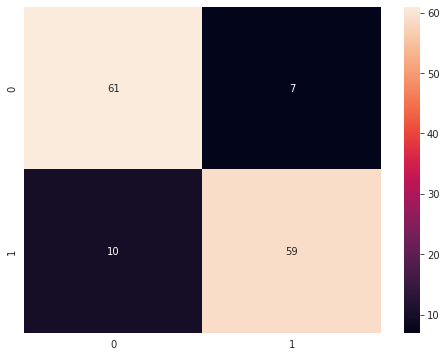

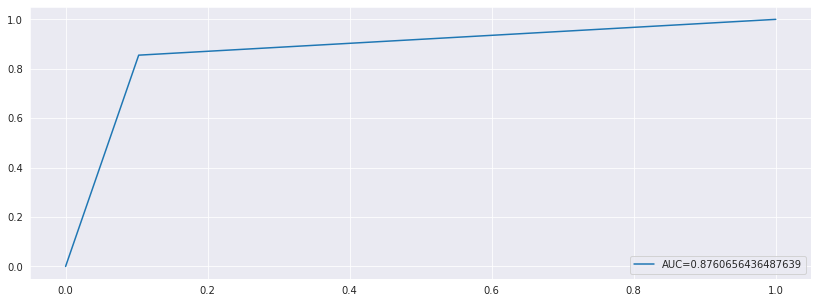

In [ ]:
y_pred = grid_search.predict(X_test)
evaluate(y_test, y_pred, " Tuned Logistic Regression")

**Hyperparameter tuning of Random Forest**

The performance of Random Forest  after tuning is affected however it imporved just slightly however the first result we got was more than enough as the accuracy of that was 94 percent.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_ = {
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'n_estimators': [100, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'max_depth': 90, 'max_features': 2, 'n_estimators': 100}

+ ==================================================================================================== +
			For TUNED RANDOM FOREST The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.948905109489051
--------------------------------------------------
F1 :  [0.94814815 0.94964029]
--------------------------------------------------
Recall :  [0.94117647 0.95652174]
--------------------------------------------------
Precision :  [0.95522388 0.94285714]
--------------------------------------------------
Confusion Matrix....
 [[64  4]
 [ 3 66]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.94      0.96      0.95        69

    accuracy                           0.95       137
   macro avg       0.95      0.95      0.95       137
weighted 

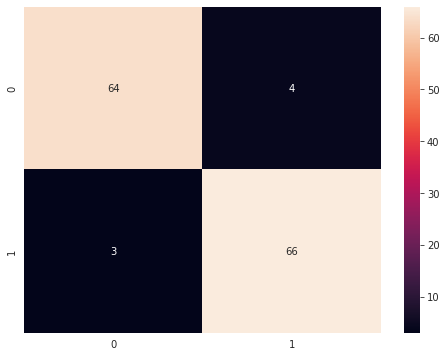

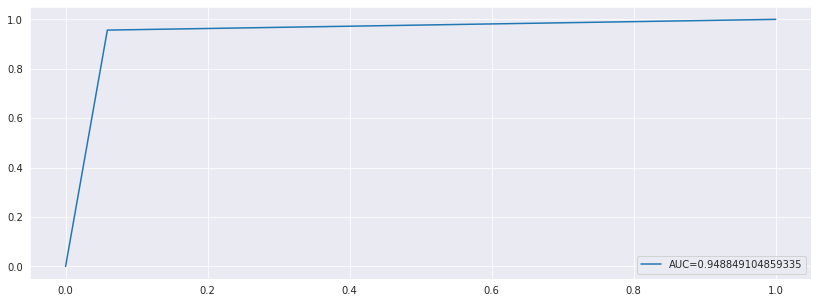

In [ ]:
y_pred = grid_search.predict(X_test)
evaluate(y_test, y_pred, "Tuned Random Forest")

**Hyperparameter tuning of ANN**

The performance of ANN after tuning is affected and provides worse results then when using the default values. I see no need with adding new layers or changing the optimizer because rmsprop updates the loss in a different way.

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                384       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="RMSProp")
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
13/13 [==============================] - 1s 20ms/step - loss: 0.6254 - accuracy: 0.6822 - val_loss: 0.5917 - val_accuracy: 0.7153
Epoch 2/15
13/13 [==============================] - 0s 5ms/step - loss: 0.5747 - accuracy: 0.7971 - val_loss: 0.5360 - val_accuracy: 0.7737
Epoch 3/15
13/13 [==============================] - 0s 5ms/step - loss: 0.5138 - accuracy: 0.8362 - val_loss: 0.4701 - val_accuracy: 0.8248
Epoch 4/15
13/13 [==============================] - 0s 5ms/step - loss: 0.4610 - accuracy: 0.8484 - val_loss: 0.4185 - val_accuracy: 0.8248
Epoch 5/15
13/13 [==============================] - 0s 5ms/step - loss: 0.4220 - accuracy: 0.8582 - val_loss: 0.3802 - val_accuracy: 0.8248
Epoch 6/15
13/13 [==============================] - 0s 7ms/step - loss: 0.3942 - accuracy: 0.8582 - val_loss: 0.3513 - val_accuracy: 0.8686
Epoch 7/15
13/13 [==============================] - 0s 5ms/step - loss: 0.3739 - accuracy: 0.8606 - val_loss: 0.3298 - val_accuracy: 0.8686
Epoch 8/15
13/13 [=

5/5 [==============================] - 0s 3ms/step
+ ==================================================================================================== +
			For TUNED ANN The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8759124087591241
--------------------------------------------------
F1 :  [0.87591241 0.87591241]
--------------------------------------------------
Recall :  [0.88235294 0.86956522]
--------------------------------------------------
Precision :  [0.86956522 0.88235294]
--------------------------------------------------
Confusion Matrix....
 [[60  8]
 [ 9 60]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        68
           1       0.88      0.87      0.88        69

    accuracy                           0.88       137
   macro avg       0.

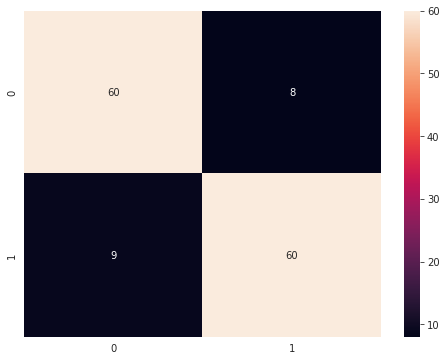

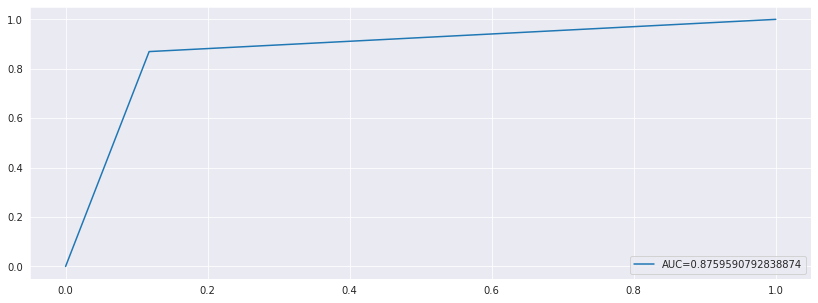

In [ ]:
y_pred = [1 if i>0.5 else 0 for i in model.predict(X_test)]
evaluate(y_test, y_pred, "Tuned ANN")